In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/12_Dec.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,12.500000,77.000000,1,6,1,1847.0,1849.0,1961.0,1673.0,1619.0,1562.0,1841.333333,1720.0
1,12.375000,76.916667,1,6,1,1807.0,1867.0,1931.0,1642.0,1573.0,1520.0,1821.333333,1691.0
2,12.250000,76.833333,1,6,1,1778.0,1876.0,1908.0,1626.0,1559.0,1500.0,1801.666667,1672.0
3,12.125000,76.750000,1,6,1,1754.0,1876.0,1883.0,1621.0,1546.0,1497.0,1782.166667,1649.0
4,12.000000,76.666667,2,6,1,1720.0,1847.0,1849.0,1569.0,1533.0,1487.0,1764.416667,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,5.842452,89.215220,23,3,1,1985.0,2067.0,2151.0,1827.0,1683.0,1801.0,2005.666667,1858.0
8924,5.842452,89.215220,24,3,1,1957.0,2055.0,2107.0,1806.0,1662.0,1781.0,1982.500000,1829.0
8925,5.842452,89.215220,24,3,1,1910.0,2052.0,2090.0,1759.0,1623.0,1748.0,1956.500000,1778.0
8926,5.500000,89.215220,24,3,1,1877.0,2024.0,2086.0,1719.0,1620.0,1735.0,1930.583333,1775.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767


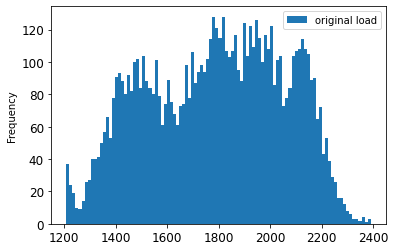

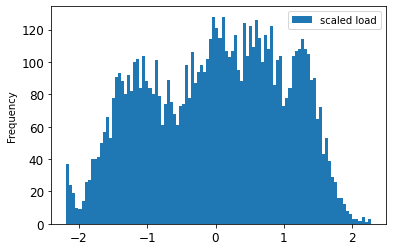

In [8]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

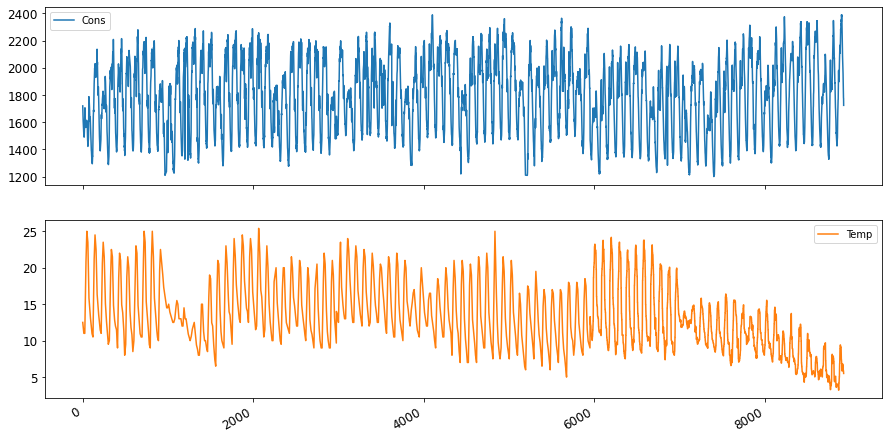

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780,-1.452658
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591,-1.505469
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722,-1.513013
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487,-1.573369
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767,-1.675219
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,-1.096238,-1.290717,-0.179895,-1.739347
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,-1.133908,-1.427144,-0.272281,-1.780842
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,-1.228084,-1.374089,-0.367308,-1.761981
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,-1.246919,-1.430933,-0.458375,-1.818564
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,-1.265754,-1.453671,-0.542512,-1.818564


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.73477,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780,-1.452658
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.73477,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591,-1.505469
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.73477,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722,-1.513013
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.73477,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487,-1.573369
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.73477,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767,-1.675219
5,-0.675578,-0.587899,0.469816,-1.516457,0.980772,0.73477,-0.367299,0.069990,0.296137,-0.983969,-1.096238,-1.290717,-0.179895,-1.739347
6,-0.724617,-0.617418,0.465134,-1.516457,0.980772,0.73477,-0.439020,-0.039529,0.330140,-0.897111,-1.133908,-1.427144,-0.272281,-1.780842
7,-0.754795,-0.646936,0.460452,-1.516457,0.980772,0.73477,-0.525840,-0.130166,0.330140,-0.874452,-1.228084,-1.374089,-0.367308,-1.761981
8,-0.818923,-0.676455,0.455769,-1.372011,0.980772,0.73477,-0.574912,-0.258567,0.220576,-0.980192,-1.246919,-1.430933,-0.458375,-1.818564
9,-0.890595,-0.705974,0.451087,-1.372011,0.980772,0.73477,-0.676832,-0.368087,0.069453,-1.002851,-1.265754,-1.453671,-0.542512,-1.818564


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7383,-0.758567,-0.973426,1.346737,1.372460,-1.423993,-1.360969,-0.642858,-0.307662,0.073231,-0.292883,-0.278791,-1.097445,-0.490710,NaN
7384,-0.917001,-0.973426,1.346737,1.516906,-1.423993,-1.360969,-0.714579,-0.436064,-0.047667,-0.417505,-0.361665,-1.142921,-0.566929,NaN
7385,-1.003762,-0.973426,1.346737,1.516906,-1.423993,-1.360969,-0.639084,-0.511595,-0.130784,-0.542127,-0.497279,-1.252820,-0.643478,NaN
7386,-1.105612,-0.992318,1.353450,1.516906,-1.423993,-1.360969,-0.639084,-0.549360,-0.240348,-0.602550,-0.610290,-1.283137,-0.719367,NaN
7387,-1.162196,-1.011210,1.360163,1.516906,-1.423993,-1.360969,-0.759877,-0.643773,-0.308353,-0.700737,-0.693165,-1.411985,-0.794266,NaN
7388,-1.264046,-1.011210,1.360163,1.661352,-1.423993,-1.360969,-0.918418,-0.715527,-0.436808,-0.802700,-0.843846,-1.461250,-0.866856,NaN
7389,-1.354580,-1.011210,1.360163,1.661352,-1.423993,-1.360969,-1.005238,-0.639997,-0.512369,-0.878229,-0.941789,-1.465040,-0.940765,NaN
7390,-1.430024,-1.027741,1.360163,1.661352,-1.423993,-1.360969,-1.107158,-0.639997,-0.550150,-0.934875,-1.005829,-1.612836,-1.017974,NaN
7391,-1.577141,-1.027741,1.381012,1.661352,-1.423993,-1.360969,-1.163780,-0.760846,-0.644601,-1.067050,-1.047266,-1.707577,-1.099802,NaN
7392,-1.603547,-1.027741,1.381012,-1.660902,-0.943040,0.734770,-1.265699,-0.919460,-0.716385,-1.123697,-1.164044,-1.787159,-1.177671,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7283,-0.173871,-0.489317,1.433847,1.228014,1.461725,-1.360969,0.312164,0.768648,0.923296,-0.190919,-0.919187,-0.021187,0.460544,-0.758567
7284,-0.173871,-0.489317,1.433847,1.372460,1.461725,-1.360969,0.146073,0.678011,0.896850,-0.240013,-1.002062,-0.043925,0.366837,-0.917001
7285,-0.234227,-0.489317,1.433847,1.372460,1.461725,-1.360969,0.021505,0.530727,0.847735,-0.281553,-1.002062,-0.066663,0.272141,-1.003762
7286,-0.139921,-0.569608,1.489514,1.372460,1.461725,-1.360969,-0.027568,0.421207,0.847735,-0.190919,-1.005829,-0.062874,0.185693,-1.105612
7287,-0.264405,-0.649900,1.545181,1.372460,1.461725,-1.360969,-0.174784,0.311688,0.768396,-0.270224,-1.088704,-0.165194,0.095286,-1.162196
7288,-0.388889,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.174784,0.145521,0.677722,-0.353305,-1.133908,-0.305410,0.001909,-1.264046
7289,-0.513372,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.235181,0.020896,0.530377,-0.489257,-1.243152,-0.438048,-0.089487,-1.354580
7290,-0.573728,-0.693587,1.557361,1.516906,1.461725,-1.360969,-0.140811,-0.028199,0.420813,-0.602550,-1.273288,-0.517630,-0.176595,-1.430024
7291,-0.671806,-0.737275,1.569542,1.516906,1.461725,-1.360969,-0.265379,-0.175484,0.311249,-0.685631,-1.401368,-0.665426,-0.262713,-1.577141
7292,-0.773656,-0.737275,1.569542,1.661352,1.461725,-1.360969,-0.389947,-0.175484,0.145015,-0.836688,-1.450339,-0.771536,-0.343221,-1.603547


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.452658
1,-1.505469
2,-1.513013
3,-1.573369
4,-1.675219
...,...
7288,-1.264046
7289,-1.354580
7290,-1.430024
7291,-1.577141


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.256860,-0.440305,0.493228,-1.660902,0.980772,0.734770,0.221569,0.228605,0.651275,-0.462822,-0.674330,-0.896594,0.209780
1,-0.366255,-0.469823,0.488546,-1.660902,0.980772,0.734770,0.070577,0.296582,0.537933,-0.579891,-0.847613,-1.055759,0.130591
2,-0.437928,-0.499342,0.483863,-1.660902,0.980772,0.734770,-0.038892,0.330571,0.451038,-0.640314,-0.900352,-1.131552,0.052722
3,-0.524689,-0.528861,0.479181,-1.660902,0.980772,0.734770,-0.129487,0.330571,0.356586,-0.659196,-0.949323,-1.142921,-0.024487
4,-0.573728,-0.558380,0.474499,-1.516457,0.980772,0.734770,-0.257830,0.221051,0.228132,-0.855570,-0.998295,-1.180817,-0.094767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.388889,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.174784,0.145521,0.677722,-0.353305,-1.133908,-0.305410,0.001909
7289,-0.513372,-0.649900,1.545181,1.516906,1.461725,-1.360969,-0.235181,0.020896,0.530377,-0.489257,-1.243152,-0.438048,-0.089487
7290,-0.573728,-0.693587,1.557361,1.516906,1.461725,-1.360969,-0.140811,-0.028199,0.420813,-0.602550,-1.273288,-0.517630,-0.176595
7291,-0.671806,-0.737275,1.569542,1.516906,1.461725,-1.360969,-0.265379,-0.175484,0.311249,-0.685631,-1.401368,-0.665426,-0.262713


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1338.0,10.012452,92.800354,1.0,2.0,1.0,1429.0,1522.0,1619.0,1464.0,1471.0,1322.0,1467.500000
7394,1321.0,9.842452,92.821242,1.0,2.0,1.0,1409.0,1495.0,1619.0,1455.0,1465.0,1292.0,1442.666667
7395,1302.0,9.672452,92.842130,1.0,2.0,1.0,1370.0,1480.0,1587.0,1429.0,1444.0,1291.0,1418.916667
7396,1288.0,9.672452,92.842130,2.0,2.0,1.0,1363.0,1453.0,1545.0,1421.0,1423.0,1269.0,1397.500000
7397,1263.0,9.672452,92.842130,2.0,2.0,1.0,1338.0,1429.0,1522.0,1388.0,1401.0,1260.0,1375.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1684.0,7.492452,95.488050,24.0,4.0,0.0,1789.0,1912.0,1995.0,1767.0,1718.0,1590.0,1839.916667
8350,1656.0,7.282452,95.488050,24.0,4.0,0.0,1772.0,1899.0,1977.0,1736.0,1695.0,1566.0,1813.166667
8351,1647.0,7.282452,95.544320,24.0,4.0,0.0,1740.0,1869.0,1953.0,1714.0,1682.5,1539.0,1787.666667
8352,1627.0,7.282452,95.544320,1.0,5.0,1.0,1710.0,1839.0,1935.0,1681.0,1670.0,1504.0,1762.000000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717


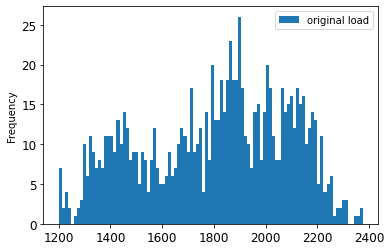

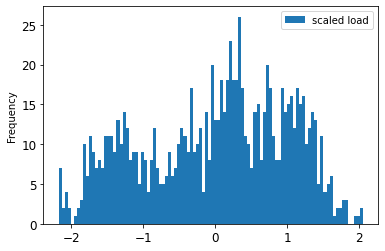

In [19]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226,-1.505260
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021,-1.595124
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768,-1.645448
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797,-1.688583
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448,-1.659827
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033,-1.688583
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144,-1.706556
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274,-1.756880
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864,-1.807204
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717,-1.846744


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226,-1.505260
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021,-1.595124
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768,-1.645448
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797,-1.688583
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448,-1.659827
7398,-2.055229,-0.336412,0.513064,-1.513750,-0.951768,0.654167,-1.729090,-1.406860,-1.094615,-1.431547,-1.416594,-1.825778,-1.679033,-1.688583
7399,-2.022878,-0.346547,0.520269,-1.513750,-0.951768,0.654167,-1.797137,-1.546189,-1.148144,-1.438650,-1.463785,-1.836739,-1.753144,-1.706556
7400,-2.062418,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.847277,-1.571197,-1.244497,-1.509686,-1.442005,-1.880584,-1.822274,-1.756880
7401,-2.073202,-0.346547,0.520269,-1.369419,-0.951768,0.654167,-1.936813,-1.660510,-1.330145,-1.541652,-1.514607,-1.869623,-1.884864,-1.807204
7402,-2.101958,-0.443841,0.702155,-1.369419,-0.951768,0.654167,-2.044256,-1.721243,-1.401517,-1.602032,-1.565428,-1.858661,-1.943717,-1.846744


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8244,0.892314,-1.088414,0.349512,1.372873,-0.393374,0.654167,1.293629,1.726247,2.049353,0.692412,0.075369,0.589343,1.494071,0.123077
8245,0.766504,-1.088414,0.349512,1.372873,-0.393374,0.654167,1.164698,1.576200,1.981549,0.656895,0.115299,0.636842,1.388508,-0.056651
8246,0.723370,-1.189762,0.464181,1.372873,-0.393374,0.654167,1.042930,1.479742,1.838803,0.568100,0.064478,0.552806,1.291665,-0.117758
8247,0.608344,-1.291110,0.578851,1.372873,-0.393374,0.654167,0.942650,1.408292,1.820960,0.440237,-0.055314,0.457808,1.186413,-0.232785
8248,0.450183,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.892510,1.293971,1.728176,0.294614,-0.171477,0.308005,1.075557,-0.340621
8249,0.317184,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.767160,1.165360,1.578293,0.262648,-0.269489,0.191086,0.966258,-0.434080
8250,0.216536,-1.287056,0.599010,1.517204,-0.393374,0.654167,0.724183,1.043894,1.481940,0.170302,-0.309420,0.077820,0.856647,-0.534728
8251,0.112294,-1.283002,0.619169,1.517204,-0.393374,0.654167,0.609578,0.943863,1.410567,0.053094,-0.360241,-0.068330,0.744234,-0.567079
8252,-0.042273,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.451995,0.893848,1.296371,-0.099633,-0.552635,-0.134097,0.628396,-0.638970
8253,-0.135731,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.319483,0.768809,1.167900,-0.199082,-0.607087,-0.152366,0.515671,-0.847455


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7393,-1.505260
7394,-1.595124
7395,-1.645448
7396,-1.688583
7397,-1.659827
...,...
8249,-0.434080
8250,-0.534728
8251,-0.567079
8252,-0.638970


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.677799,-0.188444,0.502619,-1.658081,-0.951768,0.654167,-1.342297,-1.003165,-0.652104,-1.101232,-1.039066,-1.548094,-1.255226
7394,-1.738907,-0.257361,0.504239,-1.658081,-0.951768,0.654167,-1.413925,-1.099623,-0.652104,-1.133198,-1.060847,-1.657706,-1.348021
7395,-1.807204,-0.326277,0.505858,-1.658081,-0.951768,0.654167,-1.553601,-1.153211,-0.766300,-1.225544,-1.137078,-1.661360,-1.436768
7396,-1.857528,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.578671,-1.249669,-0.916183,-1.253958,-1.213310,-1.741742,-1.516797
7397,-1.947392,-0.326277,0.505858,-1.513750,-0.951768,0.654167,-1.668206,-1.335410,-0.998262,-1.371167,-1.293172,-1.774625,-1.597448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,0.317184,-1.291110,0.578851,1.517204,-0.393374,0.654167,0.767160,1.165360,1.578293,0.262648,-0.269489,0.191086,0.966258
8250,0.216536,-1.287056,0.599010,1.517204,-0.393374,0.654167,0.724183,1.043894,1.481940,0.170302,-0.309420,0.077820,0.856647
8251,0.112294,-1.283002,0.619169,1.517204,-0.393374,0.654167,0.609578,0.943863,1.410567,0.053094,-0.360241,-0.068330,0.744234
8252,-0.042273,-1.283002,0.619169,1.661535,-0.393374,0.654167,0.451995,0.893848,1.296371,-0.099633,-0.552635,-0.134097,0.628396


In [26]:
#from keras.layers import RepeatVector
model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 0s 18ms/step - loss: 1.0386 - val_loss: 0.9773
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0342 - val_loss: 0.9742
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0304 - val_loss: 0.9715
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0270 - val_loss: 0.9691
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 1.0240 - val_loss: 0.9670
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0214 - val_loss: 0.9651
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0190 - val_loss: 0.9635
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0169 - val_loss: 0.9619
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 1.0151 - val_loss: 0.9605
Epoch 10/300
15/15 [==============================] - 0s 4ms/step - loss: 1.0132 - val_loss: 0.9592
Epoch 11

15/15 [==============================] - 0s 3ms/step - loss: 0.8113 - val_loss: 0.7164
Epoch 84/300
15/15 [==============================] - 0s 4ms/step - loss: 0.8088 - val_loss: 0.7137
Epoch 85/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8063 - val_loss: 0.7110
Epoch 86/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8039 - val_loss: 0.7084
Epoch 87/300
15/15 [==============================] - 0s 3ms/step - loss: 0.8015 - val_loss: 0.7059
Epoch 88/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7993 - val_loss: 0.7035
Epoch 89/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7971 - val_loss: 0.7011
Epoch 90/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7950 - val_loss: 0.6988
Epoch 91/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7930 - val_loss: 0.6967
Epoch 92/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7910 - val_loss: 0.6945
Epoch 93/300


15/15 [==============================] - 0s 3ms/step - loss: 0.6970 - val_loss: 0.6066
Epoch 246/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6968 - val_loss: 0.6065
Epoch 247/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6966 - val_loss: 0.6063
Epoch 248/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6963 - val_loss: 0.6062
Epoch 249/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6961 - val_loss: 0.6060
Epoch 250/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6959 - val_loss: 0.6059
Epoch 251/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6957 - val_loss: 0.6057
Epoch 252/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6954 - val_loss: 0.6055
Epoch 253/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6952 - val_loss: 0.6054
Epoch 254/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6950 - val_loss: 0.6053
Epoc

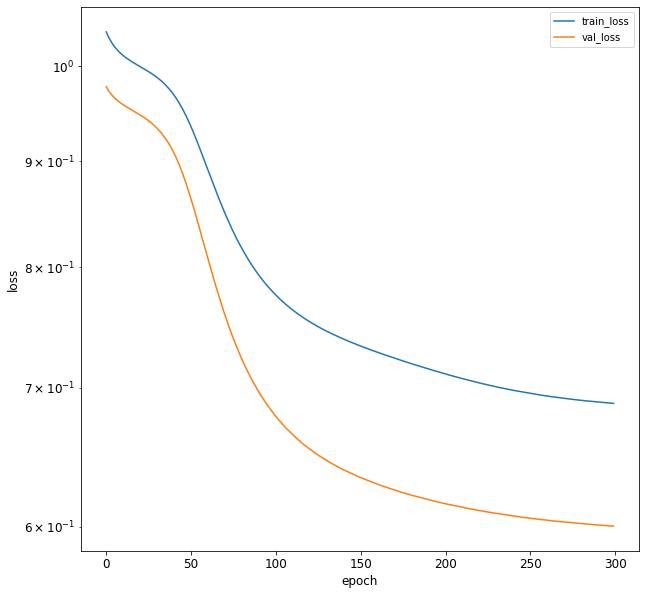

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1569.0,7.027451,96.230560,1.0,5.0,1.0,1656.0,1772.0,1899.0,1634.0,1615.0,1474.0,1705.916667
8355,1546.0,6.772451,96.916800,1.0,5.0,1.0,1647.0,1740.0,1869.0,1614.0,1579.0,1453.0,1679.000000
8356,1523.0,6.772451,96.916800,2.0,5.0,1.0,1627.0,1710.0,1839.0,1581.0,1566.0,1435.0,1652.666667
8357,1494.0,6.772451,96.916800,2.0,5.0,1.0,1569.0,1684.0,1789.0,1555.0,1553.0,1406.0,1628.083333
8358,1474.0,6.752451,97.656980,2.0,5.0,1.0,1569.0,1656.0,1772.0,1541.0,1523.0,1394.0,1603.250000
8359,1471.0,6.732451,98.397160,2.0,5.0,1.0,1546.0,1647.0,1740.0,1535.0,1515.0,1372.0,1580.833333
8360,1467.0,6.732451,98.397160,3.0,5.0,1.0,1523.0,1627.0,1710.0,1527.0,1500.0,1366.0,1560.583333
8361,1448.0,6.732451,98.397160,3.0,5.0,1.0,1494.0,1569.0,1684.0,1515.0,1478.0,1341.0,1540.916667
8362,1444.0,6.087451,99.209612,3.0,5.0,1.0,1474.0,1569.0,1656.0,1496.0,1475.0,1355.0,1523.250000
8363,1431.0,5.442451,100.022064,3.0,5.0,1.0,1471.0,1546.0,1647.0,1487.0,1471.0,1322.0,1505.250000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


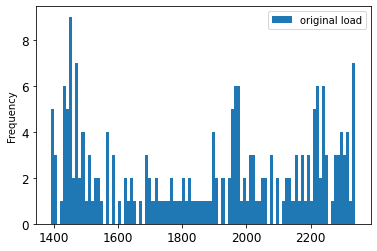

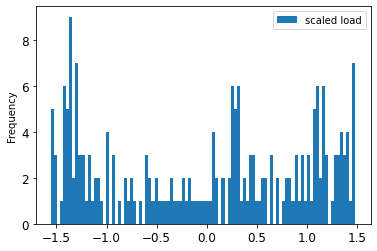

In [33]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,-0.779254,-1.161860,-0.595280,-1.081008
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,-0.907989,-1.232720,-0.686228,-1.164104
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,-0.954476,-1.293457,-0.775206,-1.160908
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,-1.000964,-1.391311,-0.858270,-1.224829
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,-1.108242,-1.431803,-0.942179,-1.256789
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,-1.136850,-1.506037,-1.017923,-1.304729
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,-1.190489,-1.526282,-1.086345,-1.339885
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,-1.269160,-1.610640,-1.152797,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,-1.279888,-1.563400,-1.212490,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,-1.294192,-1.674751,-1.273310,-1.371846


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,-0.779254,-1.161860,-0.595280,-1.081008
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,-0.907989,-1.232720,-0.686228,-1.164104
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,-0.954476,-1.293457,-0.775206,-1.160908
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,-1.000964,-1.391311,-0.858270,-1.224829
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,-1.108242,-1.431803,-0.942179,-1.256789
8359,-1.295141,-0.267376,0.694884,-1.357685,-1.004934,0.340279,-1.078017,-0.783252,-0.511523,-1.063819,-1.136850,-1.506037,-1.017923,-1.304729
8360,-1.307925,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.152364,-0.849059,-0.612160,-1.092647,-1.190489,-1.526282,-1.086345,-1.339885
8361,-1.368649,-0.267376,0.694884,-1.217006,-1.004934,0.340279,-1.246106,-1.039902,-0.699379,-1.135888,-1.269160,-1.610640,-1.152797,-1.368649
8362,-1.381434,-0.559957,0.779343,-1.217006,-1.004934,0.340279,-1.310756,-1.039902,-0.793306,-1.204354,-1.279888,-1.563400,-1.212490,-1.381434
8363,-1.422982,-0.852537,0.863802,-1.217006,-1.004934,0.340279,-1.320453,-1.115581,-0.823497,-1.236785,-1.294192,-1.674751,-1.273310,-1.371846


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8461,-1.368649,-1.251718,0.739542,-1.076327,0.516823,0.340279,-1.249339,-1.053063,-0.813434,-1.586320,-1.322799,-1.313703,-1.200383,-1.400610
8462,-1.381434,-1.312956,0.724797,-1.076327,0.516823,0.340279,-1.281663,-1.141904,-0.853688,-1.579113,-1.397894,-1.276585,-1.255008,-1.426178
8463,-1.371846,-1.374194,0.710052,-1.076327,0.516823,0.340279,-1.330151,-1.227454,-0.904007,-1.557493,-1.362135,-1.330574,-1.304565,-1.368649
8464,-1.384630,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.365708,-1.224164,-1.034835,-1.575510,-1.337103,-1.273211,-1.344267,-1.343081
8465,-1.352669,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.394800,-1.289971,-1.098572,-1.571907,-1.383591,-1.259714,-1.375803,-1.285553


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8354,-1.081008
8355,-1.164104
8356,-1.160908
8357,-1.224829
8358,-1.256789
...,...
8461,-1.400610
8462,-1.426178
8463,-1.368649
8464,-1.343081


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,-0.981931,-0.133559,0.469654,-1.498364,-1.004934,0.340279,-0.722444,-0.371953,0.021852,-0.707077,-0.779254,-1.161860,-0.595280
8355,-1.055440,-0.249231,0.540993,-1.498364,-1.004934,0.340279,-0.751537,-0.477246,-0.078785,-0.779146,-0.907989,-1.232720,-0.686228
8356,-1.128948,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-0.816186,-0.575957,-0.179422,-0.898060,-0.954476,-1.293457,-0.775206
8357,-1.221633,-0.249231,0.540993,-1.357685,-1.004934,0.340279,-1.003670,-0.661507,-0.347150,-0.991750,-1.000964,-1.391311,-0.858270
8358,-1.285553,-0.258303,0.617938,-1.357685,-1.004934,0.340279,-1.003670,-0.753638,-0.404177,-1.042198,-1.108242,-1.431803,-0.942179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.368649,-1.251718,0.739542,-1.076327,0.516823,0.340279,-1.249339,-1.053063,-0.813434,-1.586320,-1.322799,-1.313703,-1.200383
8462,-1.381434,-1.312956,0.724797,-1.076327,0.516823,0.340279,-1.281663,-1.141904,-0.853688,-1.579113,-1.397894,-1.276585,-1.255008
8463,-1.371846,-1.374194,0.710052,-1.076327,0.516823,0.340279,-1.330151,-1.227454,-0.904007,-1.557493,-1.362135,-1.330574,-1.304565
8464,-1.384630,-1.374194,0.710052,-0.935648,0.516823,0.340279,-1.365708,-1.224164,-1.034835,-1.575510,-1.337103,-1.273211,-1.344267


In [39]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.19301104545593262s


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1876.235849
dtype: float64
Cons    313.629919
dtype: float64


In [41]:
load_mean=1876.235849
load_std=313.629919
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


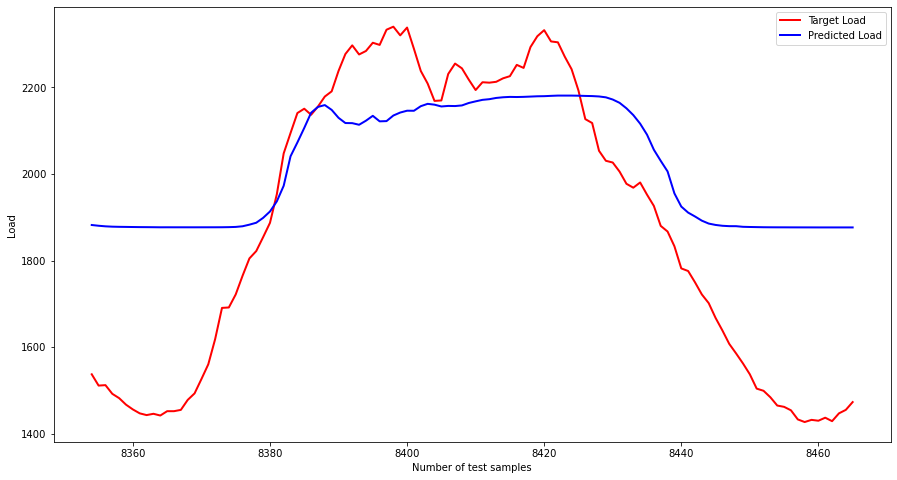

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

12.548308380788315


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -9.385934
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8354  153597.511687
8355  150989.360873
8356  151089.768082
8357  149083.417807
8358  148080.224193
...             ...
8461  143565.691549
8462  142763.065494
8463  144568.963478
8464  145371.571760
8465  147177.411577

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8354  118907.966514
8355  136279.789324
8356  134562.238941
8357  149061.097901
8358  156612.999542
...             ...
8461  193141.271280
8462  200250.703818
8463  184425.501905
8464  177601.243861
8465  162721.347375

[112 rows x 1 columns]
y_t+100    63446.453608
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    251.885795
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1882.0298]
[1880.2988]
[1878.9675]
[1878.1772]
[1877.8129]
[1877.607]
[1877.3723]
[1877.1631]
[1877.0697]
[1876.9188]
[1876.7439]
[1876.7793]
[1876.7412]
[1876.7452]
[1876.725]
[1876.7166]
[1876.744]
[1876.7682]
[1876.7842]
[1876.8632]
[1877.1023]
[1877.6064]
[1879.1106]
[1882.8138]
[1887.2697]
[1898.4926]
[1913.2123]
[1936.6447]
[1972.658]
[2040.77]
[2072.721]
[2106.1965]
[2141.3105]
[2154.802]
[2159.028]
[2147.9255]
[2129.6223]
[2117.5527]
[2117.2866]
[2113.5676]
[2122.9597]
[2134.2107]
[2121.48]
[2122.0168]
[2134.92]
[2141.7876]
[2146.0132]
[2145.8994]
[2156.4678]
[2161.8904]
[2159.975]
[2155.828]
[2157.0906]
[2156.7708]
[2158.213]
[2163.8503]
[2167.642]
[2171.0955]
[2172.65]
[2175.5203]
[2177.0774]
[2177.9194]
[2177.6362]
[2178.009]
[2178.6636]
[2179.3489]
[2179.6057]
[2180.3374]
[2180.9617]
[2180.9429]
[2180.9348]
[2180.6643]
[2180.1665]
[2179.8145]
[2178.9543]
[2176.9155]
[2171.852]
[2164.226]
[2151.5771]
[2135.9421]
[2116.1047]
[2090.7502]
[2055.91]
[2030.2567]
[2005.7921]
[195